# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [69]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#scaling data
from scipy.stats import zscore

#clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist, cdist

#PCA
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [6]:
df.shape

(340, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [8]:
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [10]:
df.isnull().value_counts()

Ticker Symbol  Security  GICS Sector  GICS Sub Industry  Current Price  Price Change  Volatility  ROE    Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio
False          False     False        False              False          False         False       False  False       False          False       False               False                         False      False        340
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

<Axes: xlabel='Current Price', ylabel='Count'>

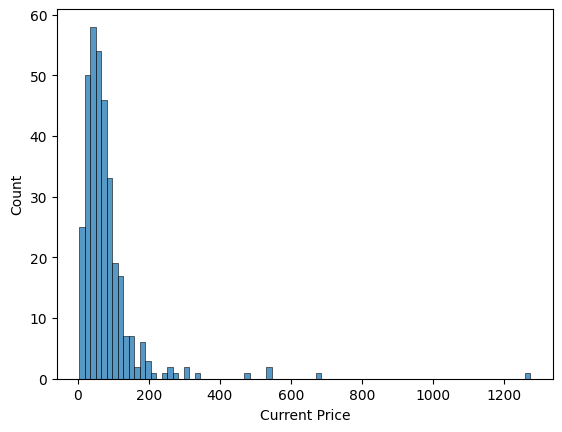

In [11]:
sns.histplot(df, x = 'Current Price')

The price distribution is right skewed, since the minimum entry in the data is 4.5 dollars, it is not due to 0s in the data set

In [16]:
df.groupby('GICS Sector')['Price Change'].describe()

,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,5.846093,13.290771,-33.131268,1.227730,3.543658,12.249013,34.803917
Consumer Staples,19.0,8.684750,8.795128,-12.017268,5.426784,6.976738,12.605282,24.496225
Energy,30.0,-10.228289,16.939222,-47.129693,-20.668060,-9.244788,2.959008,17.341522
Financials,49.0,3.865406,6.024301,-14.292764,-0.361785,3.910301,7.696534,15.462833
Health Care,40.0,9.585652,9.848818,-12.532337,1.528455,10.324402,16.775604,33.177346
Industrials,53.0,2.833127,9.922247,-23.244191,-2.797977,3.952561,10.105078,20.432767
Information Technology,33.0,7.217476,14.462923,-23.790903,-1.827858,7.496965,14.035095,55.051683
Materials,20.0,5.589738,15.283690,-31.685167,-1.306572,4.906245,15.450133,37.489677
Real Estate,27.0,6.205548,5.623694,-13.067267,4.198144,7.578608,9.139503,15.573900


Information Technology has the highest price increase on average

In [9]:
NumData= df.iloc[:,4:]
NumData.head()



,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


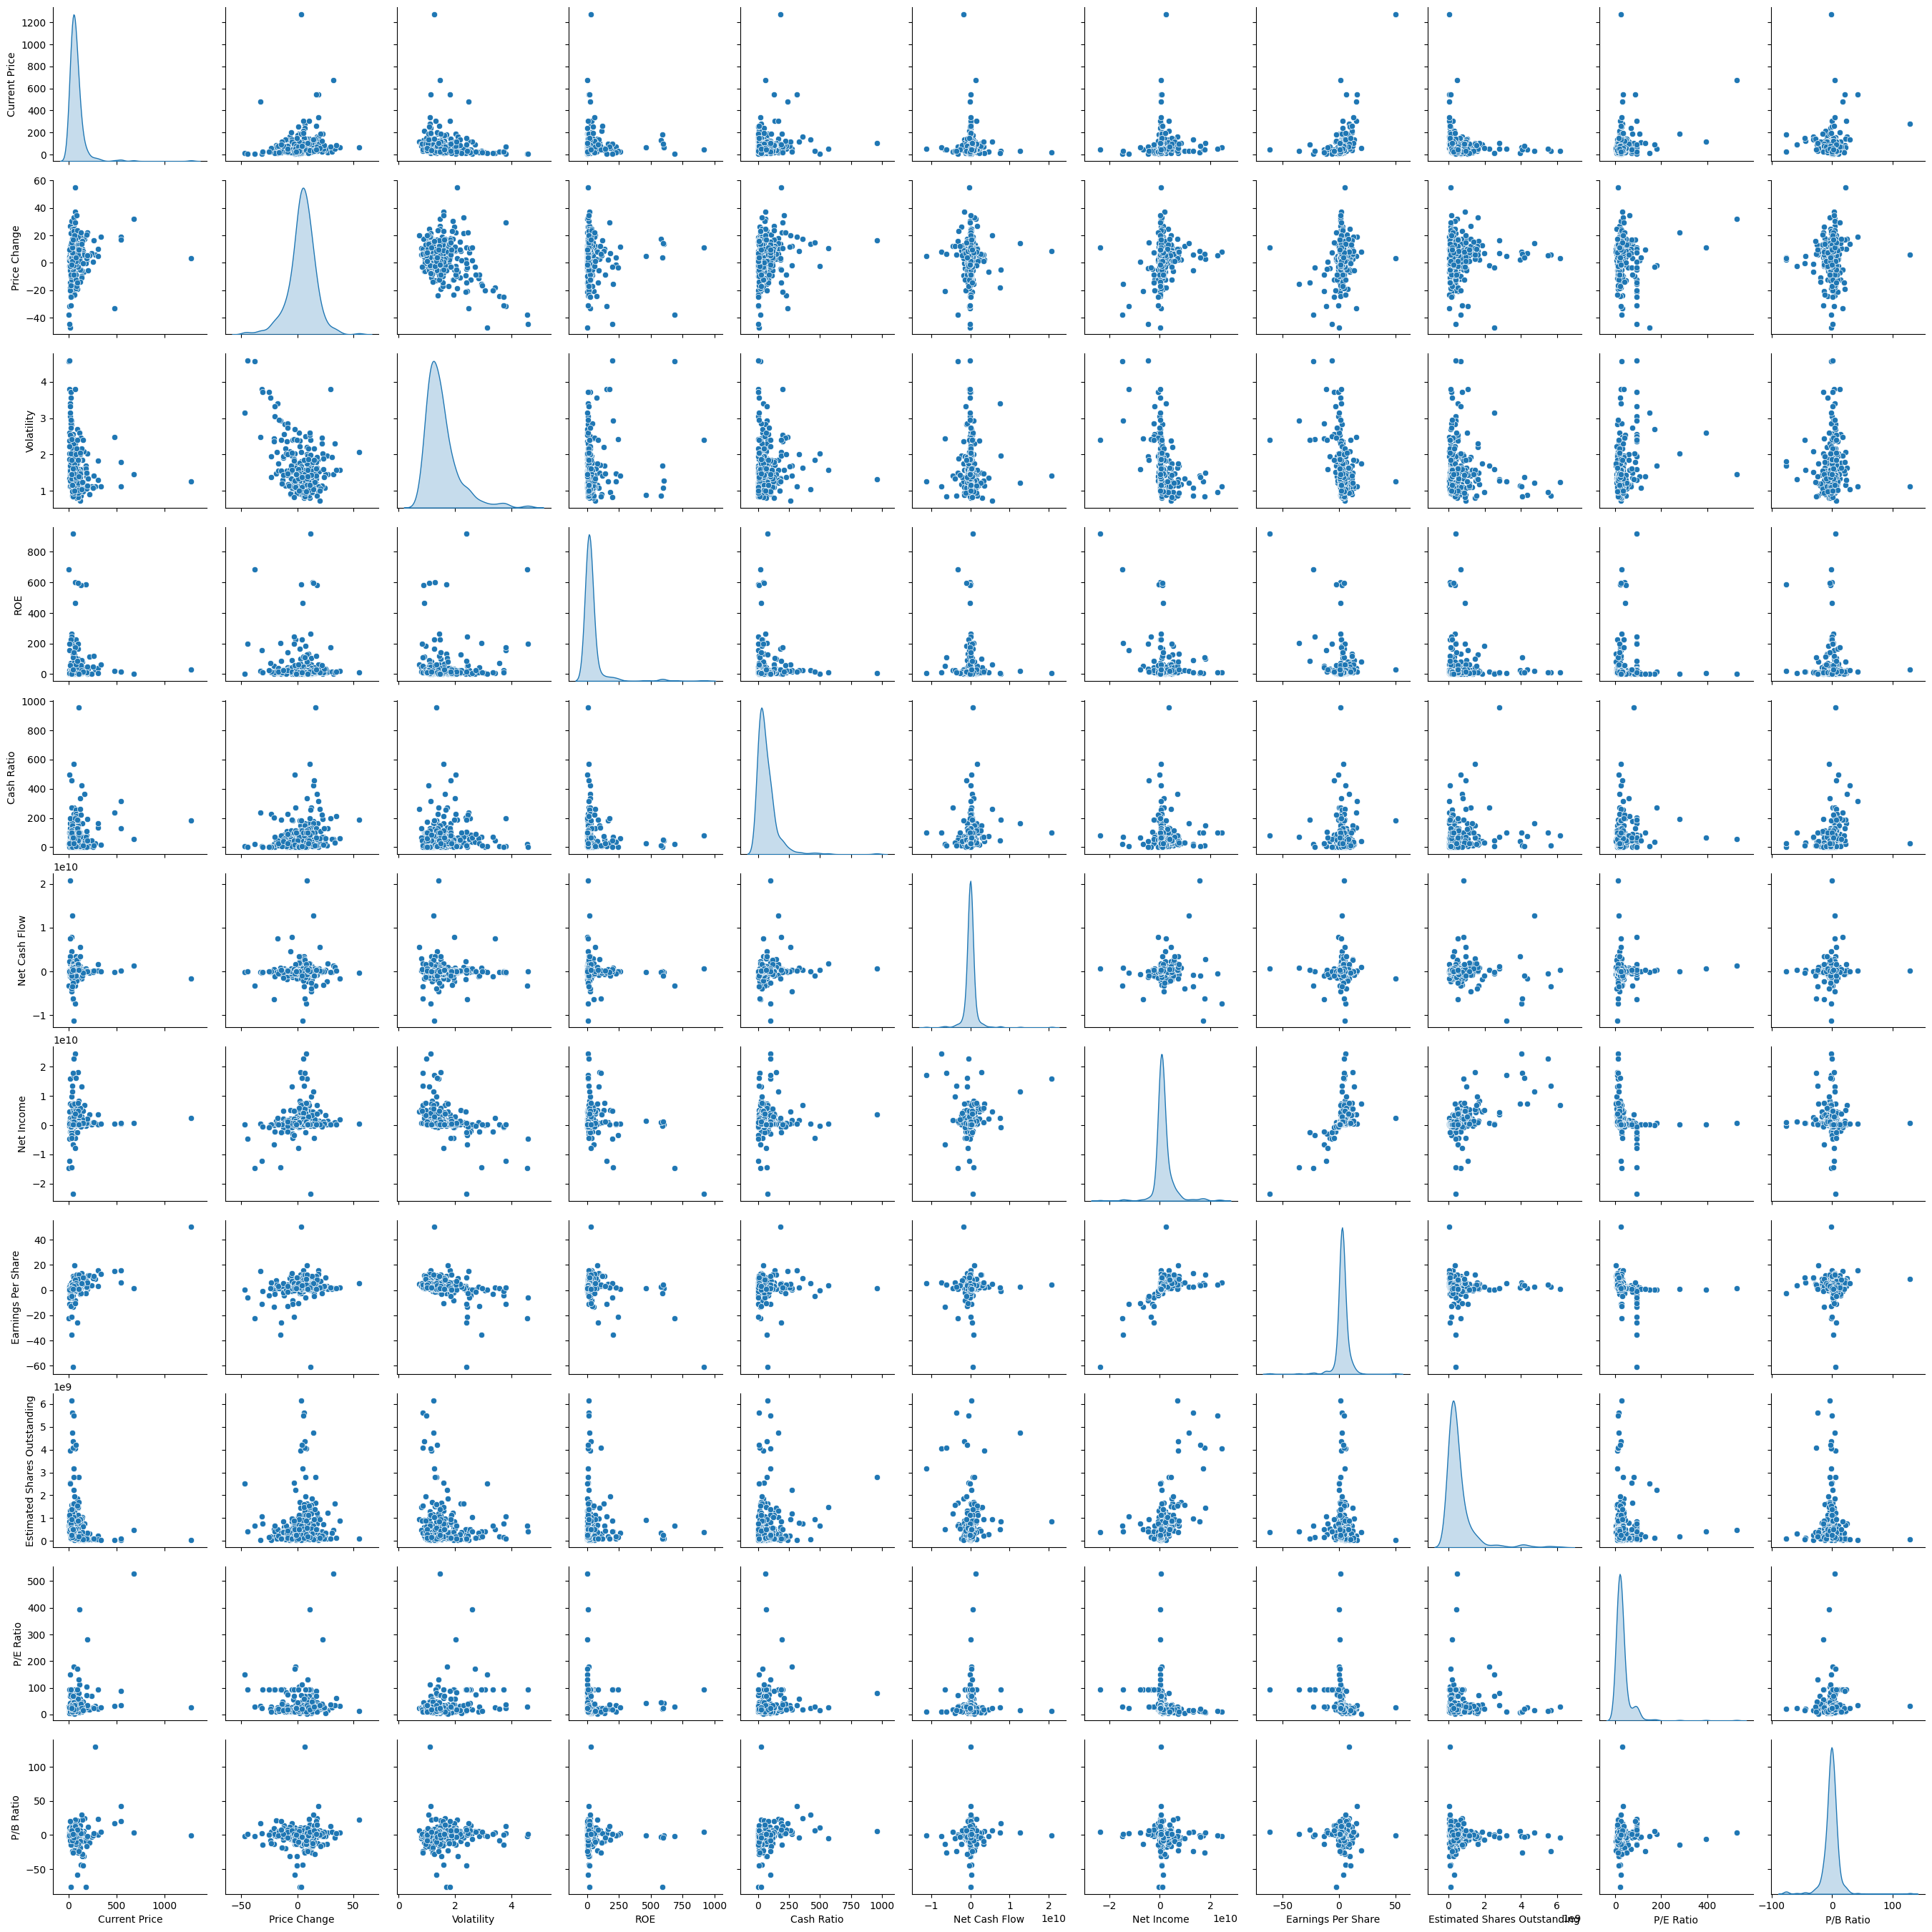

In [22]:
sns.pairplot(NumData, diag_kind = 'kde')

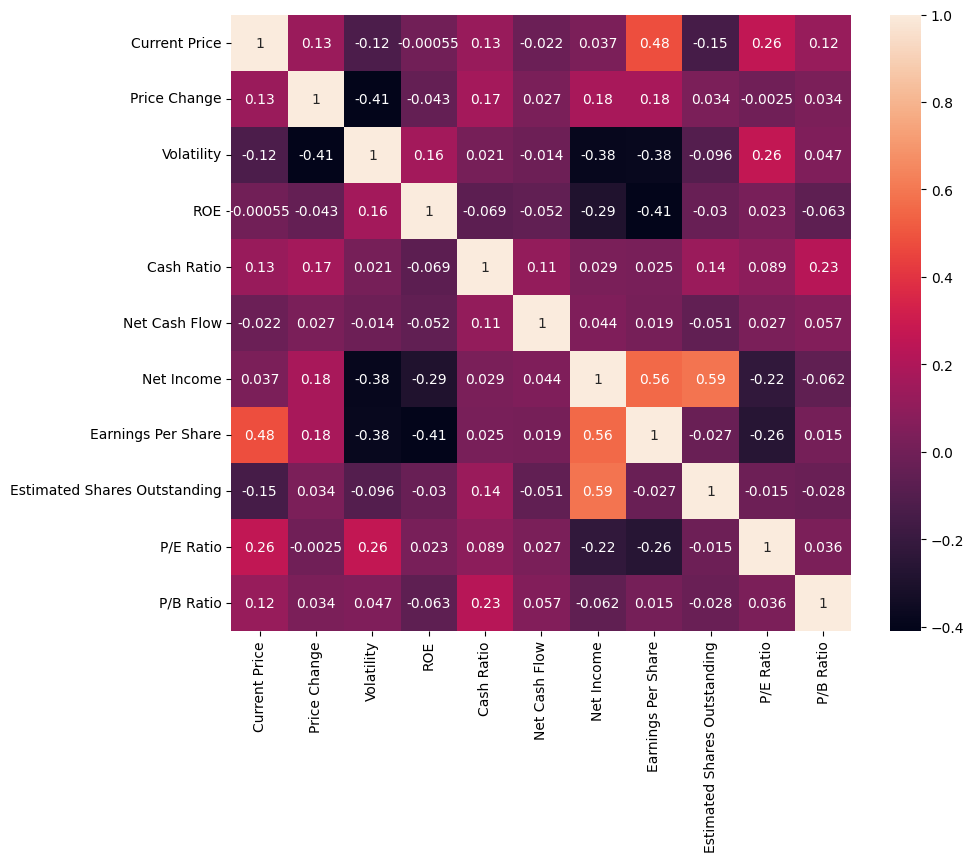

In [17]:
c_matrix = NumData.corr()
plt.figure(figsize = (10,8))
sns.heatmap(c_matrix, annot = True)
plt.show()

Significant correlation between variables:


*   net income has a .59 correlation with outstanding shares
*   earnings per share has .56 correlation with earnings per share


*   current price is most highly correlated with earnings per share (.48)
*   earnings per share is negatively correlated with return on equity (.-41)


*   volatility is negatively correlated with net income and earnings per share(-.38)








In [108]:
df.groupby('GICS Sector')['Cash Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,49.575000,69.208302,0.0,11.5,25.0,35.50,260.0
Consumer Staples,19.0,70.947368,125.832549,9.0,18.0,33.0,63.00,568.0
Energy,30.0,51.133333,55.939458,0.0,7.0,38.5,68.50,201.0
Financials,49.0,98.591837,17.907073,51.0,99.0,99.0,99.00,183.0
Health Care,40.0,103.775000,104.118150,3.0,41.5,70.0,128.25,425.0
Industrials,53.0,36.188679,29.127080,1.0,15.0,31.0,44.00,130.0
Information Technology,33.0,149.818182,174.231429,16.0,45.0,126.0,180.00,958.0
Materials,20.0,41.700000,50.396428,2.0,10.0,25.0,49.50,198.0
Real Estate,27.0,50.111111,28.250709,12.0,47.0,47.0,47.00,164.0


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

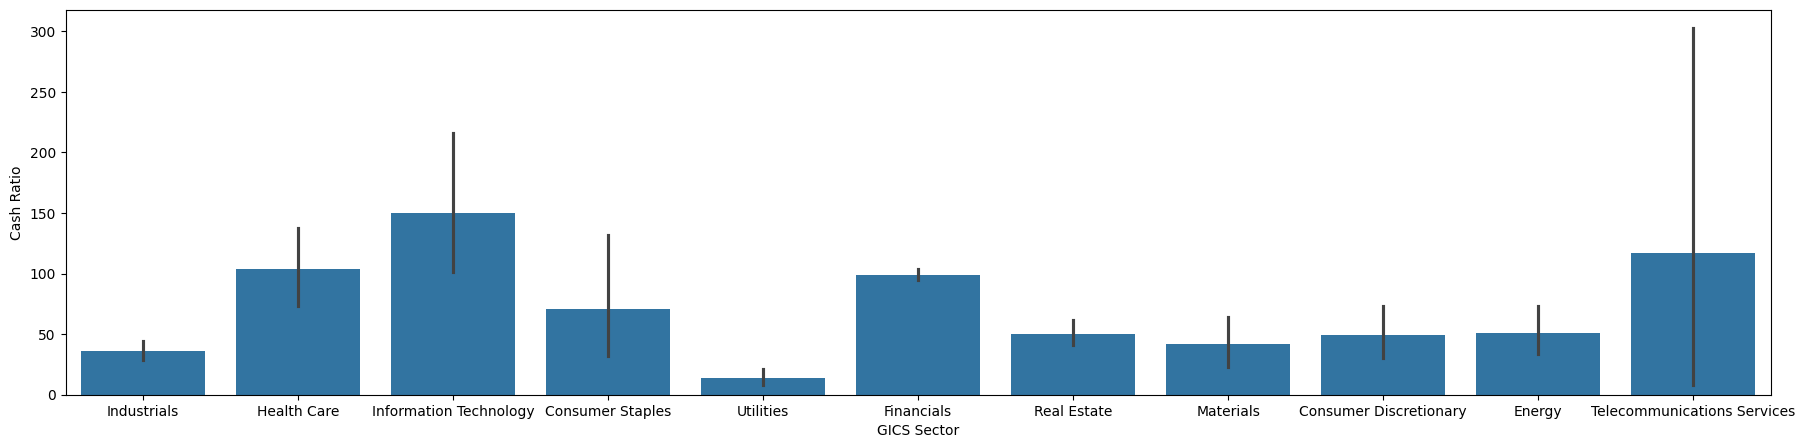

In [116]:
plt.figure(figsize = (22,5))
sns.barplot(data = df, x = 'GICS Sector', y = 'Cash Ratio')
plt.show()

Information Technology has the highest average cash ratio, and utilites has the lowest

In [111]:
df.groupby('GICS Sector')['P/E Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Consumer Discretionary,40.0,35.211613,80.902902,5.566284,15.459391,20.819876,25.887634,528.039074
Consumer Staples,19.0,25.521195,10.291193,9.986637,21.391092,24.070121,26.176366,48.412370
Energy,30.0,72.897709,42.144306,8.429600,28.407929,93.089287,93.089287,171.962965
Financials,49.0,16.023151,7.281892,4.304511,10.914049,14.276451,18.703854,38.721154
Health Care,40.0,41.135272,46.756416,8.180275,19.165522,27.967442,35.700025,280.514706
Industrials,53.0,18.259380,7.587633,2.935451,13.048485,17.334711,20.556076,41.199999
Information Technology,33.0,43.782546,70.242260,10.209198,18.249407,25.309524,31.040405,394.413783
Materials,20.0,24.585352,12.349729,9.033264,16.001852,22.811951,32.226881,57.210844
Real Estate,27.0,43.065585,22.799372,13.164179,28.294875,33.685393,48.266787,110.764709


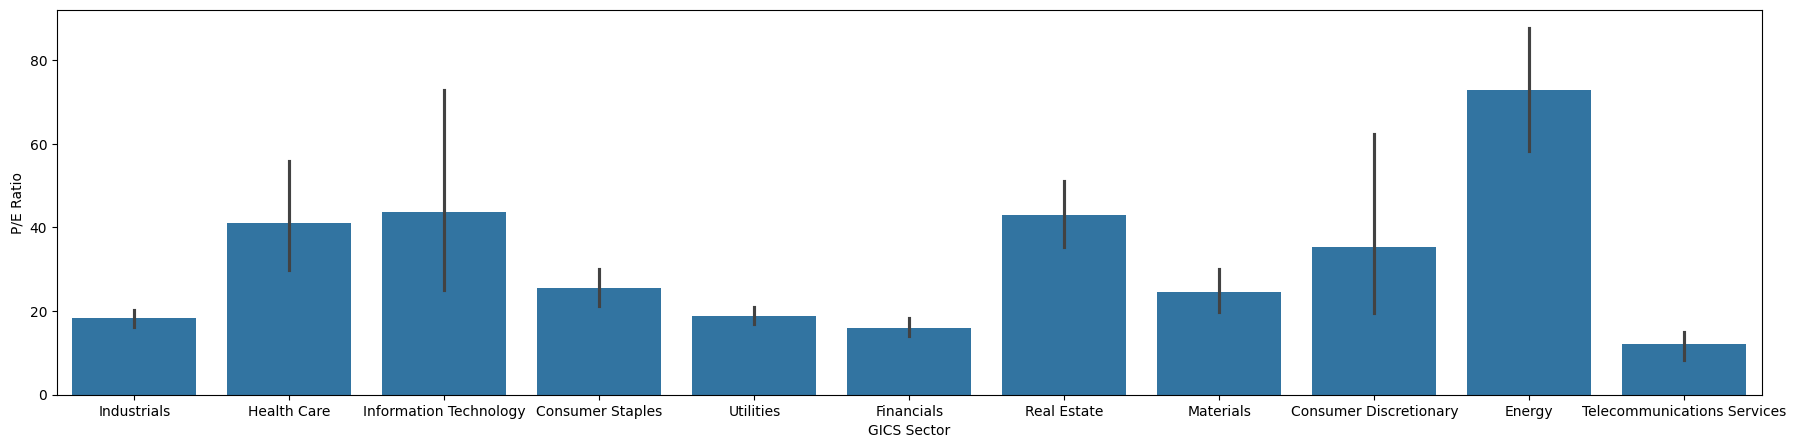

In [117]:
plt.figure(figsize = (22,5))
sns.barplot(data = df, x = 'GICS Sector', y = 'P/E Ratio')
plt.show()

Energy has the highest P/E ratio (72.9) and Telecommunication Services has the lowest (12.2)

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [119]:
df.isnull().value_counts()

Ticker Symbol  Security  GICS Sector  GICS Sub Industry  Current Price  Price Change  Volatility  ROE    Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio
False          False     False        False              False          False         False       False  False       False          False       False               False                         False      False        340
Name: count, dtype: int64

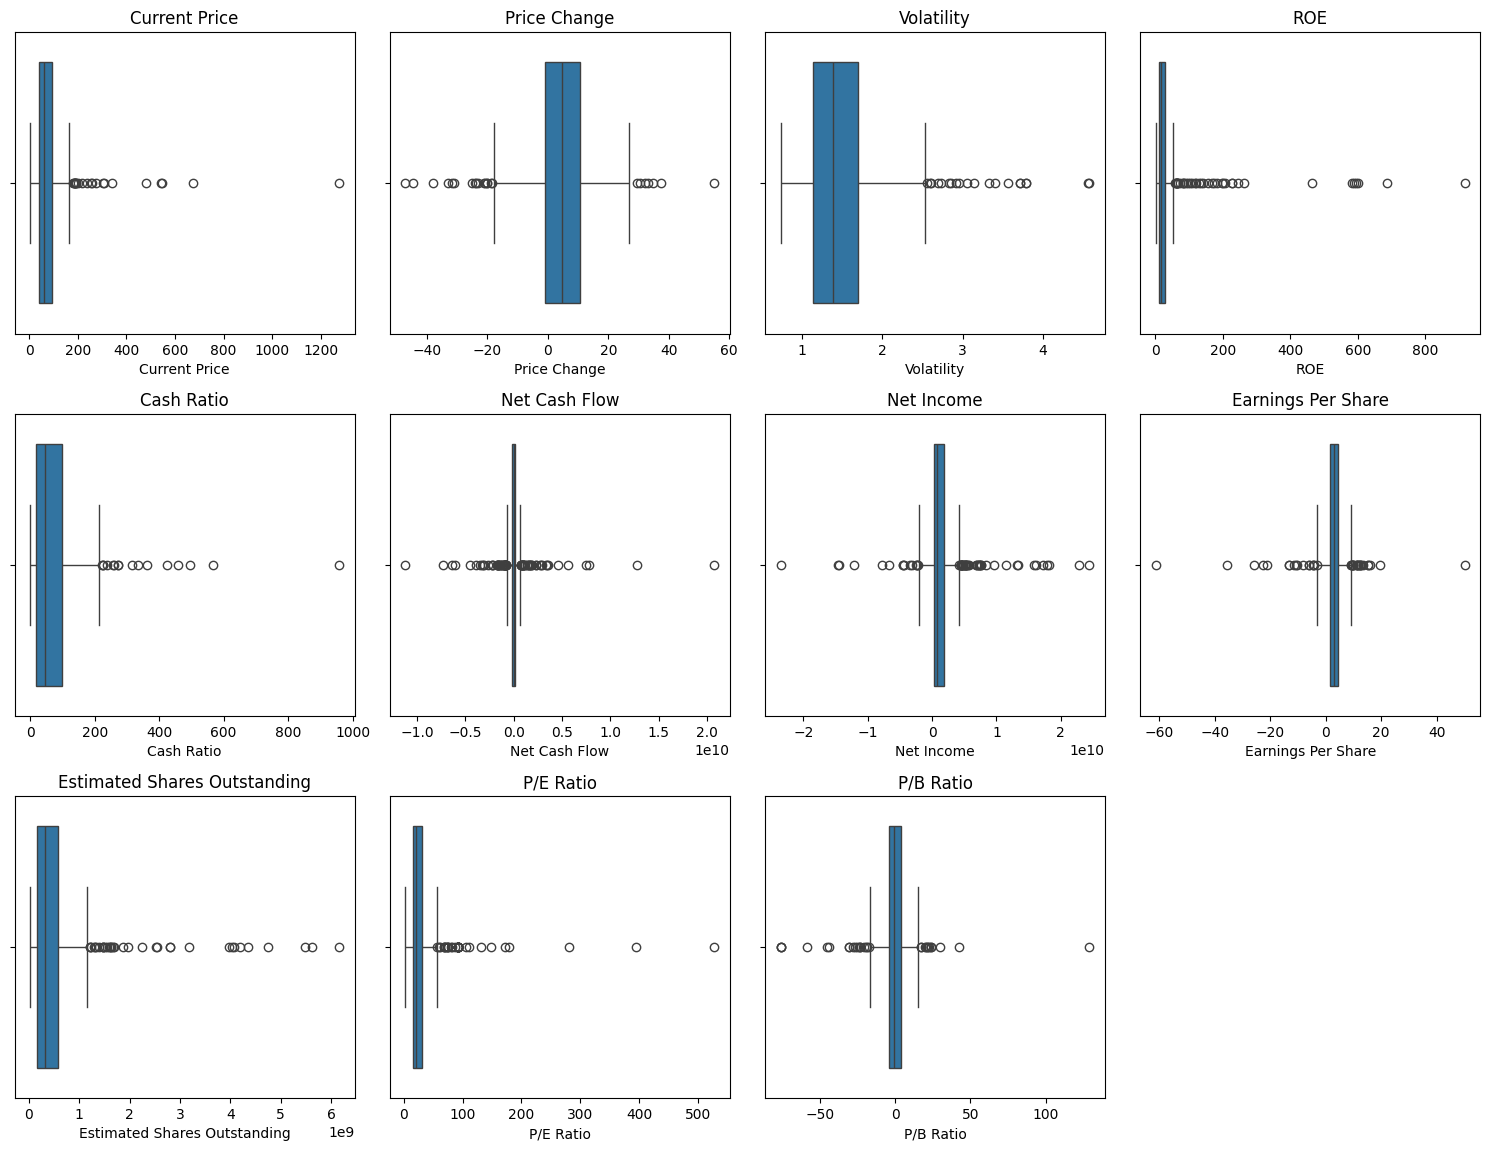

In [124]:
plt.figure(figsize=(15, 15))

for i, num in enumerate(NumData):   #looping through the list and creating boxplots
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df, x = num)
    plt.tight_layout()
    plt.title(num)

plt.show()

In [132]:
data_scaled=NumData.apply(zscore)
data_scaled.head(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879


## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: xlabel='Current Price', ylabel='Count'>

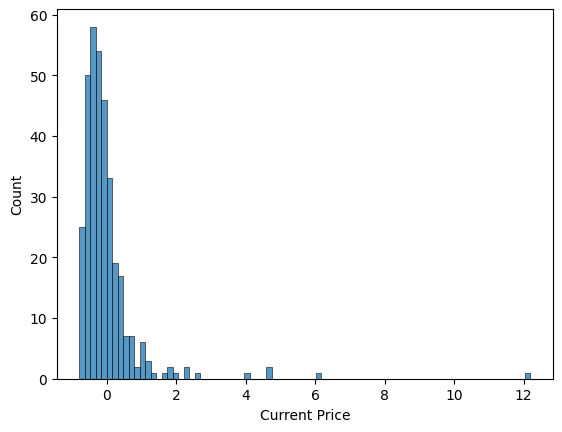

In [128]:
sns.histplot(data_scaled['Current Price'])

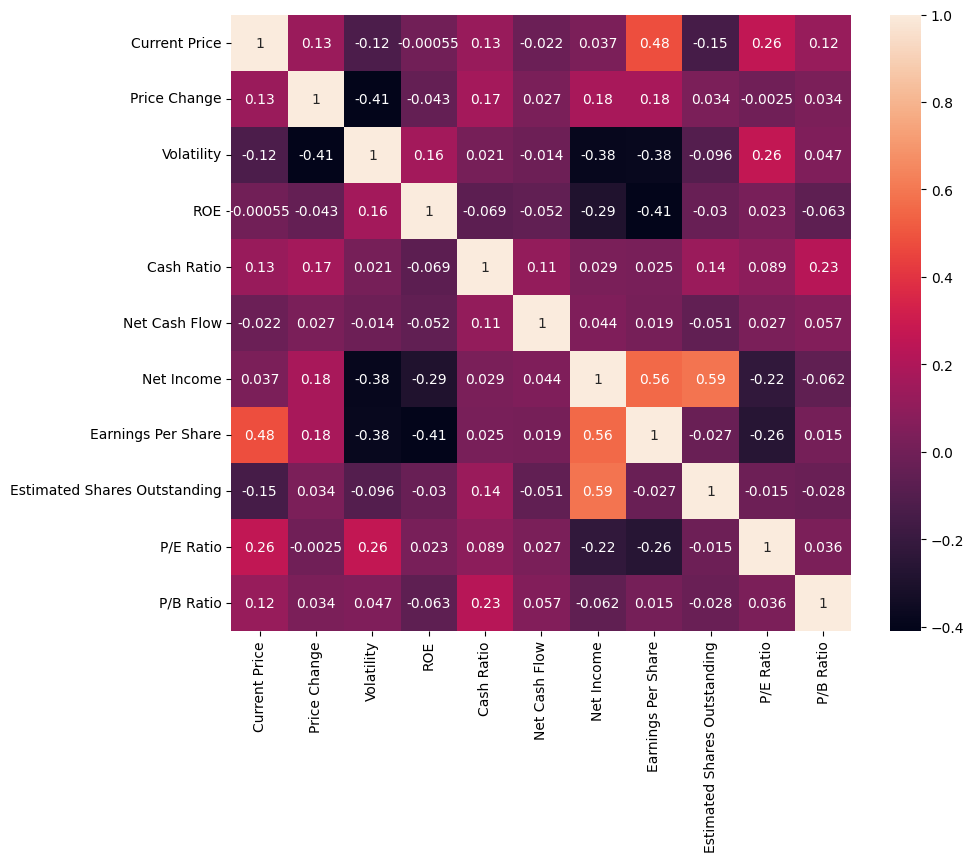

In [129]:
c_matrix = data_scaled.corr()
plt.figure(figsize = (10,8))
sns.heatmap(c_matrix, annot = True)
plt.show()

Data the same, no missing values were found or outliers need to be taken out.

## K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

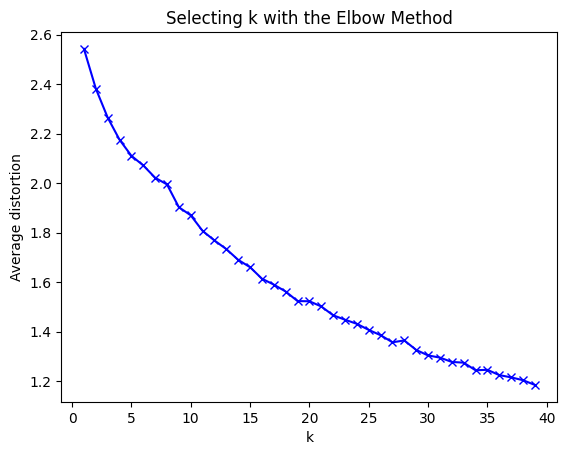

In [133]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,40)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    meanDistortions.append(sum(np.min(cdist(data_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')




I chose the elbow point to be at 11, since there is a diminishing return in the amount of distortion reduced past 11 the graph

In [134]:
final_model=KMeans(11) #creating a model with 11 clusters
final_model.fit(data_scaled)
prediction=final_model.predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [135]:
data_scaled3 = data_scaled.copy()

In [136]:
data_scaled3['group'] = prediction #creating the column indicating the cluster placement

data_scaled3.head(15)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,group
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,4
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,4
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,4
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,1
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,6
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752,1
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562,10
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614,1
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530,1
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879,1


In [137]:
data_scaled3.groupby(['group']).describe() #gives statistical breakdown of groups and includes counts to check amount of points per cluster

Current Price                                                    \
              count      mean       std       min       25%       50%   
group                                                                   
0               7.0  0.214238  0.573931 -0.568296 -0.226965  0.443645   
1             205.0 -0.171391  0.396219 -0.717310 -0.430518 -0.259035   
2               9.0 -0.349197  0.193482 -0.681971 -0.474435 -0.353815   
3               6.0 -0.608997  0.175291 -0.779918 -0.755865 -0.626155   
4              49.0  0.365823  0.703182 -0.478521 -0.103690  0.172684   
5              14.0  0.034799  0.466544 -0.778181 -0.277036  0.012794   
6              35.0 -0.386744  0.295344 -0.750311 -0.607822 -0.483832   
7               2.0 -0.564007  0.127251 -0.653987 -0.608997 -0.564007   
8               3.0  2.513965  3.110436  0.342329  0.732326  1.122324   
9               5.0  0.280272  0.499929 -0.152612 -0.145462  0.180957   
10              5.0  5.548088  3.881970  1.998837  4.075013  4.718660   

                           Price Change            ... P/E Ratio             \
            75%        max        count      mean  ...       75%        max   
group                                              ...                        
0      0.636219   0.805812          7.0 -0.332669  ... -0.262285  -0.184992   
1     -0.001760   2.262648        205.0  0.131341  ... -0.082731   2.233634   
2     -0.270679  -0.029745          9.0  0.090783  ... -0.279242  -0.091370   
3     -0.494760  -0.371689          6.0 -2.035689  ...  1.365673   1.365673   
4      0.650875   2.637786         49.0  0.226460  ... -0.264427   0.089346   
5      0.393140   0.832060         14.0  1.233627  ...  0.136667   1.067680   
6     -0.253163   0.569066         35.0 -1.408584  ...  1.365673   3.293307   
7     -0.519017  -0.474027          2.0  0.597207  ... -0.420934  -0.413652   
8      3.599784   6.077244          3.0  1.488004  ...  9.678869  11.187619   
9      0.474285   1.044192          5.0  0.555489  ...  0.246817   0.297601   
10     4.752261  12.195670          5.0 -0.140367  ...  0.040694   1.250418   

      P/B Ratio                                                              \
          count      mean       std       min       25%       50%       75%   
group                                                                         
0           7.0 -3.585902  1.372509 -5.334786 -4.708474 -3.109635 -2.569932   
1         205.0 -0.012756  0.518347 -1.886820 -0.187066  0.000170  0.282355   
2           9.0 -0.332412  0.779596 -1.768378 -0.178904 -0.012091  0.039488   
3           6.0  0.230595  0.169935 -0.008768  0.138580  0.232880  0.313073   
4          49.0 -0.030202  0.608771 -1.539975 -0.404053  0.032189  0.349747   
5          14.0  0.764503  0.732145 -0.248989  0.346998  0.575348  0.994128   
6          35.0  0.294072  0.525660 -0.920876  0.078360  0.312488  0.557419   
7           2.0  0.231367  0.248083  0.055946  0.143657  0.231367  0.319078   
8           3.0 -0.258428  0.648473 -0.892931 -0.589224 -0.285517  0.058824   
9           5.0 -1.085094  2.377920 -5.334786 -0.176439 -0.058421  0.060288   
10          5.0  3.109360  3.676262  0.047742  1.356596  1.586597  3.178303   

                 
            max  
group            
0     -2.100084  
1      1.833811  
2      0.489519  
3      0.479628  
4      1.703015  
5      2.241833  
6      1.544465  
7      0.406789  
8      0.403165  
9      0.083888  
10     9.377562  

[11 rows x 88 columns]

In [196]:
data_scaled3.groupby(['group']).mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
group,,,,,,,,,,,
0,0.214238,-0.332669,0.416818,-0.253660,-0.261329,-0.001592,-0.091583,0.313886,-0.499580,-0.306873,-3.585902
1,-0.171391,0.131341,-0.277168,-0.190273,-0.203080,-0.034907,-0.152401,0.010678,-0.259258,-0.163359,-0.012756
2,-0.349197,0.090783,-0.755776,-0.151413,-0.129476,-1.593107,3.394221,0.100165,4.721654,-0.384263,-0.332412
3,-0.608997,-2.035689,3.252245,3.752239,-0.443286,-0.203690,-3.461278,-4.418713,-0.075136,0.857738,0.230595
4,0.365823,0.226460,-0.391024,0.073191,-0.142662,0.103037,0.817817,0.746615,0.266106,-0.363328,-0.030202
5,0.034799,1.233627,0.459855,-0.055835,3.346164,0.111947,-0.092920,-0.075394,0.201990,0.032809,0.764503
6,-0.386744,-1.408584,1.566439,-0.226394,0.037080,-0.008666,-0.578217,-0.718243,-0.038397,0.739119,0.294072
7,-0.564007,0.597207,-0.344579,-0.281074,0.669815,8.592722,3.090627,0.078798,2.622293,-0.428216,0.231367
8,2.513965,1.488004,0.852517,-0.369243,0.398462,0.330693,-0.306744,-0.308093,-0.248951,8.318604,-0.258428


array([[<Axes: title={'center': 'Cash Ratio'}, xlabel='[group]'>,
        <Axes: title={'center': 'Current Price'}, xlabel='[group]'>,
        <Axes: title={'center': 'Earnings Per Share'}, xlabel='[group]'>,
        <Axes: title={'center': 'Estimated Shares Outstanding'}, xlabel='[group]'>],
       [<Axes: title={'center': 'Net Cash Flow'}, xlabel='[group]'>,
        <Axes: title={'center': 'Net Income'}, xlabel='[group]'>,
        <Axes: title={'center': 'P/B Ratio'}, xlabel='[group]'>,
        <Axes: title={'center': 'P/E Ratio'}, xlabel='[group]'>],
       [<Axes: title={'center': 'Price Change'}, xlabel='[group]'>,
        <Axes: title={'center': 'ROE'}, xlabel='[group]'>,
        <Axes: title={'center': 'Volatility'}, xlabel='[group]'>,
        <Axes: >]], dtype=object)

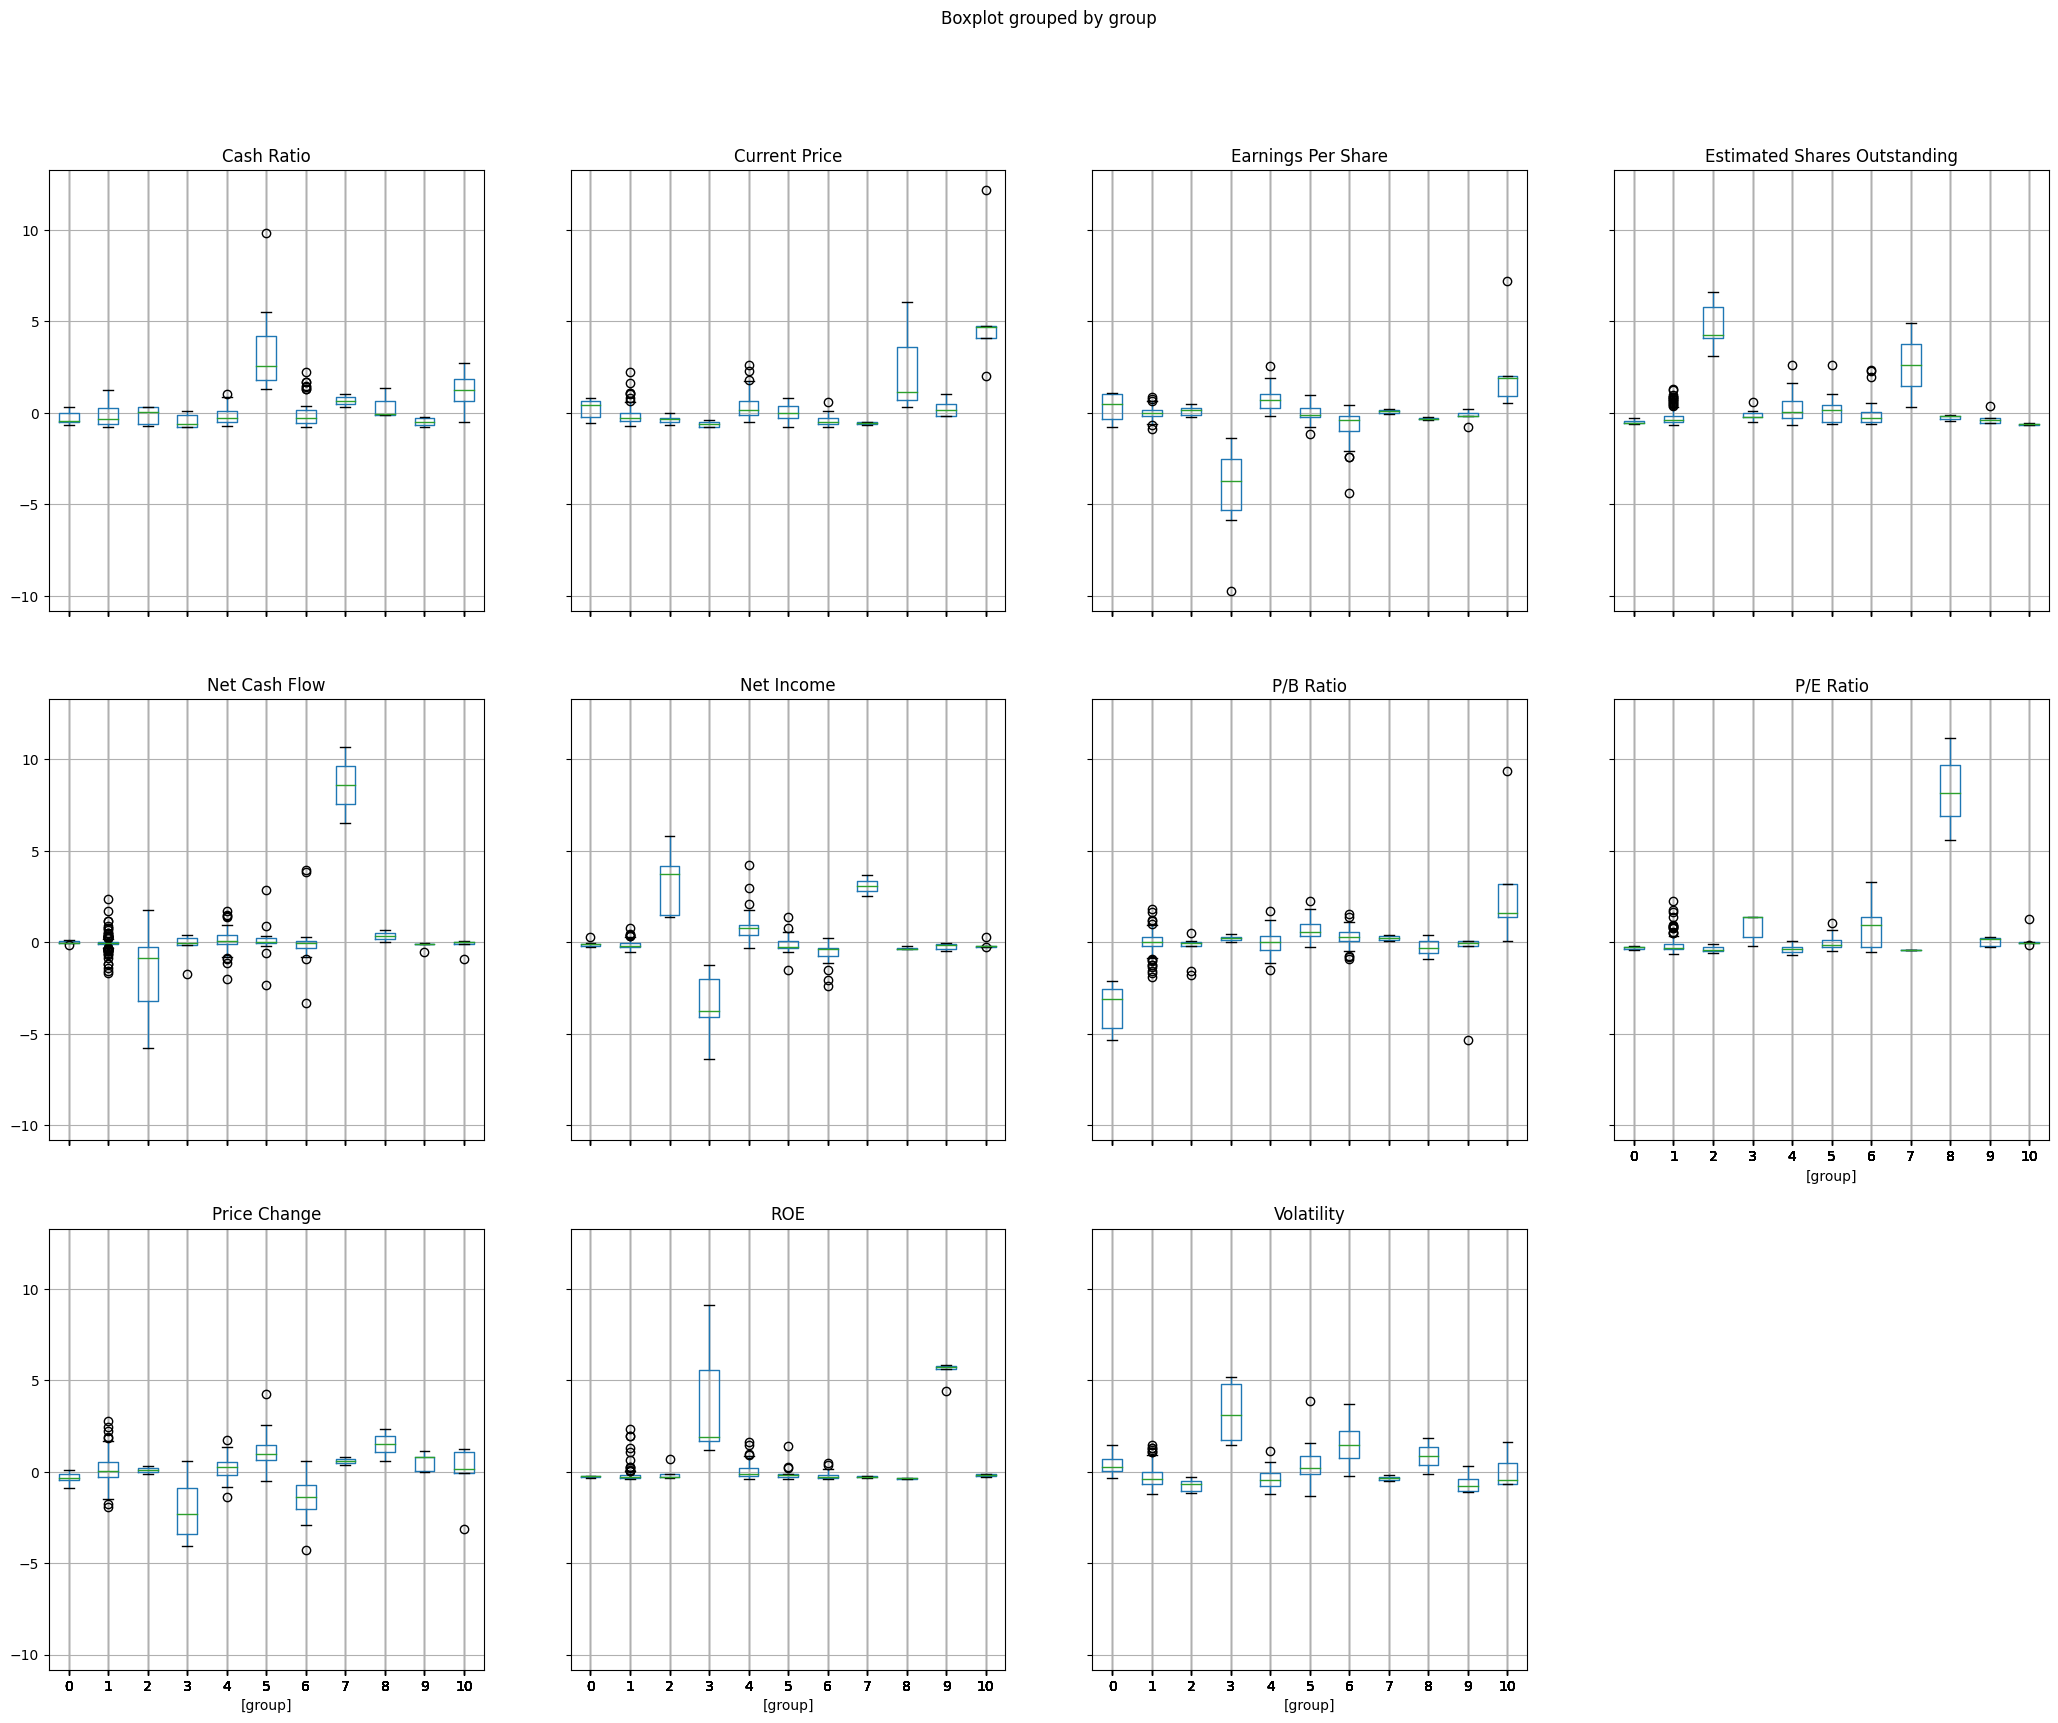

In [197]:
data_scaled3.boxplot(by='group', layout = (3,4),figsize=(25,20))

In [148]:
dfkm = df.copy()

In [150]:
dfkm['group'] = prediction

dfkm.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,group
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,4
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,4
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,4
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,1
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,6


In [159]:
dfkm.groupby('group')['GICS Sector'].value_counts()

group  GICS Sector                
0      Consumer Discretionary          4
       Financials                      2
       Health Care                     1
1      Industrials                    35
       Financials                     34
       Real Estate                    25
       Consumer Discretionary         24
       Utilities                      23
       Health Care                    21
       Information Technology         18
       Materials                      13
       Consumer Staples               10
       Energy                          1
       Telecommunications Services     1
2      Financials                      3
       Telecommunications Services     2
       Consumer Discretionary          1
       Consumer Staples                1
       Energy                          1
       Health Care                     1
3      Energy                          5
       Materials                       1
4      Industrials                    13
       Health Care    

## Hierarchical Clustering

In [103]:
data_scaled2= data_scaled.copy()

In [28]:
model = AgglomerativeClustering(metric='euclidean',  linkage='average')

In [29]:
model.fit(data_scaled2)

AgglomerativeClustering(linkage='average', metric='euclidean')

In [130]:
data_scaled2["Labels"] = model.labels_
data_scaled2.head(20)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Labels
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,3
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,35
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,35
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,28
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,20
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752,0
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562,17
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614,16
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530,16
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879,15


In [31]:
data_scaled2.groupby(['Labels']).mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Labels,,,,,,,,,,,
0,-0.035975,0.000218,0.001286,0.000324,-0.003724,0.002621,-0.000792,-0.021217,0.001837,0.000477,-0.000141
1,12.195670,-0.074042,-0.435986,-0.109922,1.262362,-0.888563,0.268653,7.192572,-0.622886,-0.161672,0.047742


In [32]:
data_scaled2.groupby(['Labels']).describe()

Current Price                                                       \
               count       mean       std        min       25%        50%   
Labels                                                                      
0              339.0  -0.035975  0.751383  -0.779918  -0.43348  -0.216548   
1                1.0  12.195670       NaN  12.195670  12.19567  12.195670   

                             Price Change            ... P/E Ratio             \
              75%        max        count      mean  ...       75%        max   
Labels                                               ...                        
0        0.121617   6.077244        339.0  0.000218  ... -0.017436  11.187619   
1       12.195670  12.195670          1.0 -0.074042  ... -0.161672  -0.161672   

       P/B Ratio                                                              \
           count      mean       std       min       25%       50%       75%   
Labels                                                                         
0          339.0 -0.000141  1.002951 -5.334786 -0.190639  0.045628  0.404977   
1            1.0  0.047742       NaN  0.047742  0.047742  0.047742  0.047742   

                  
             max  
Labels            
0       9.377562  
1       0.047742  

[2 rows x 88 columns]

In [92]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled2, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled2))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [38]:
Z = linkage(data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data_scaled))

c

0.9422917688961091

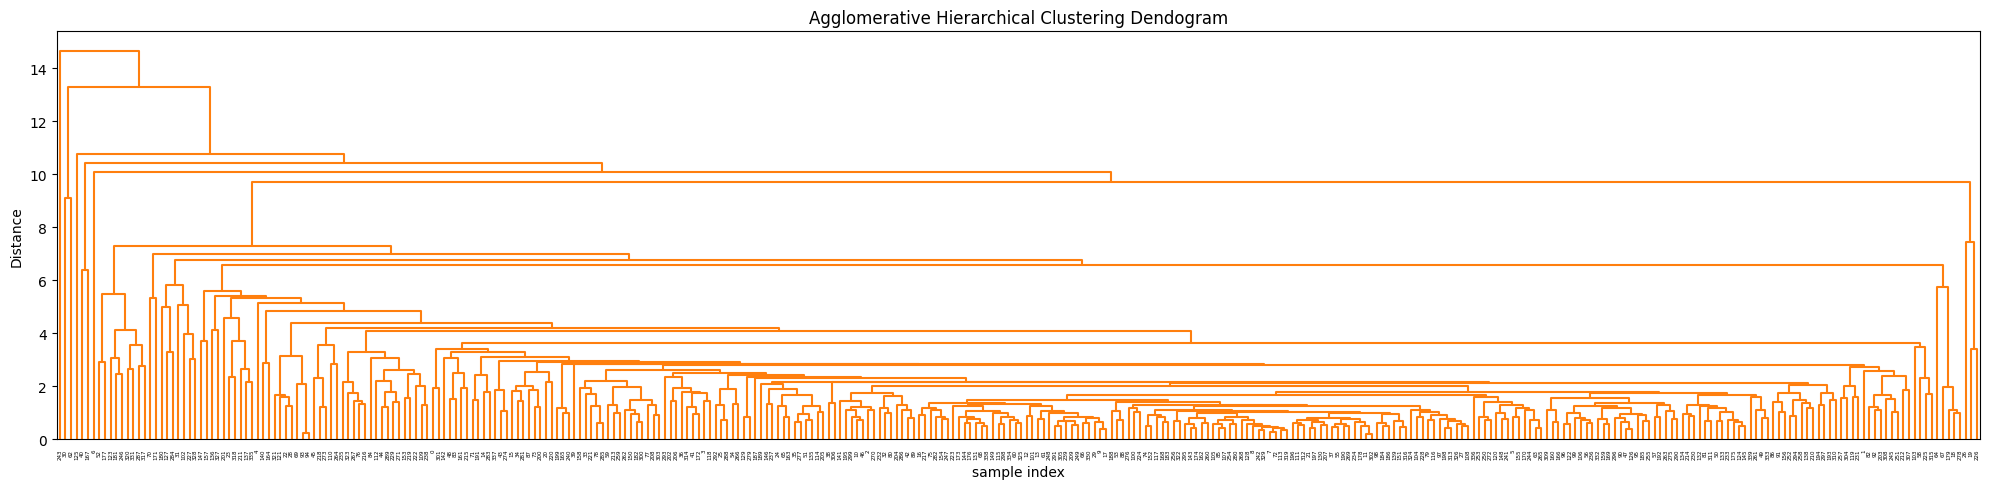

In [42]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=4. )
plt.tight_layout()

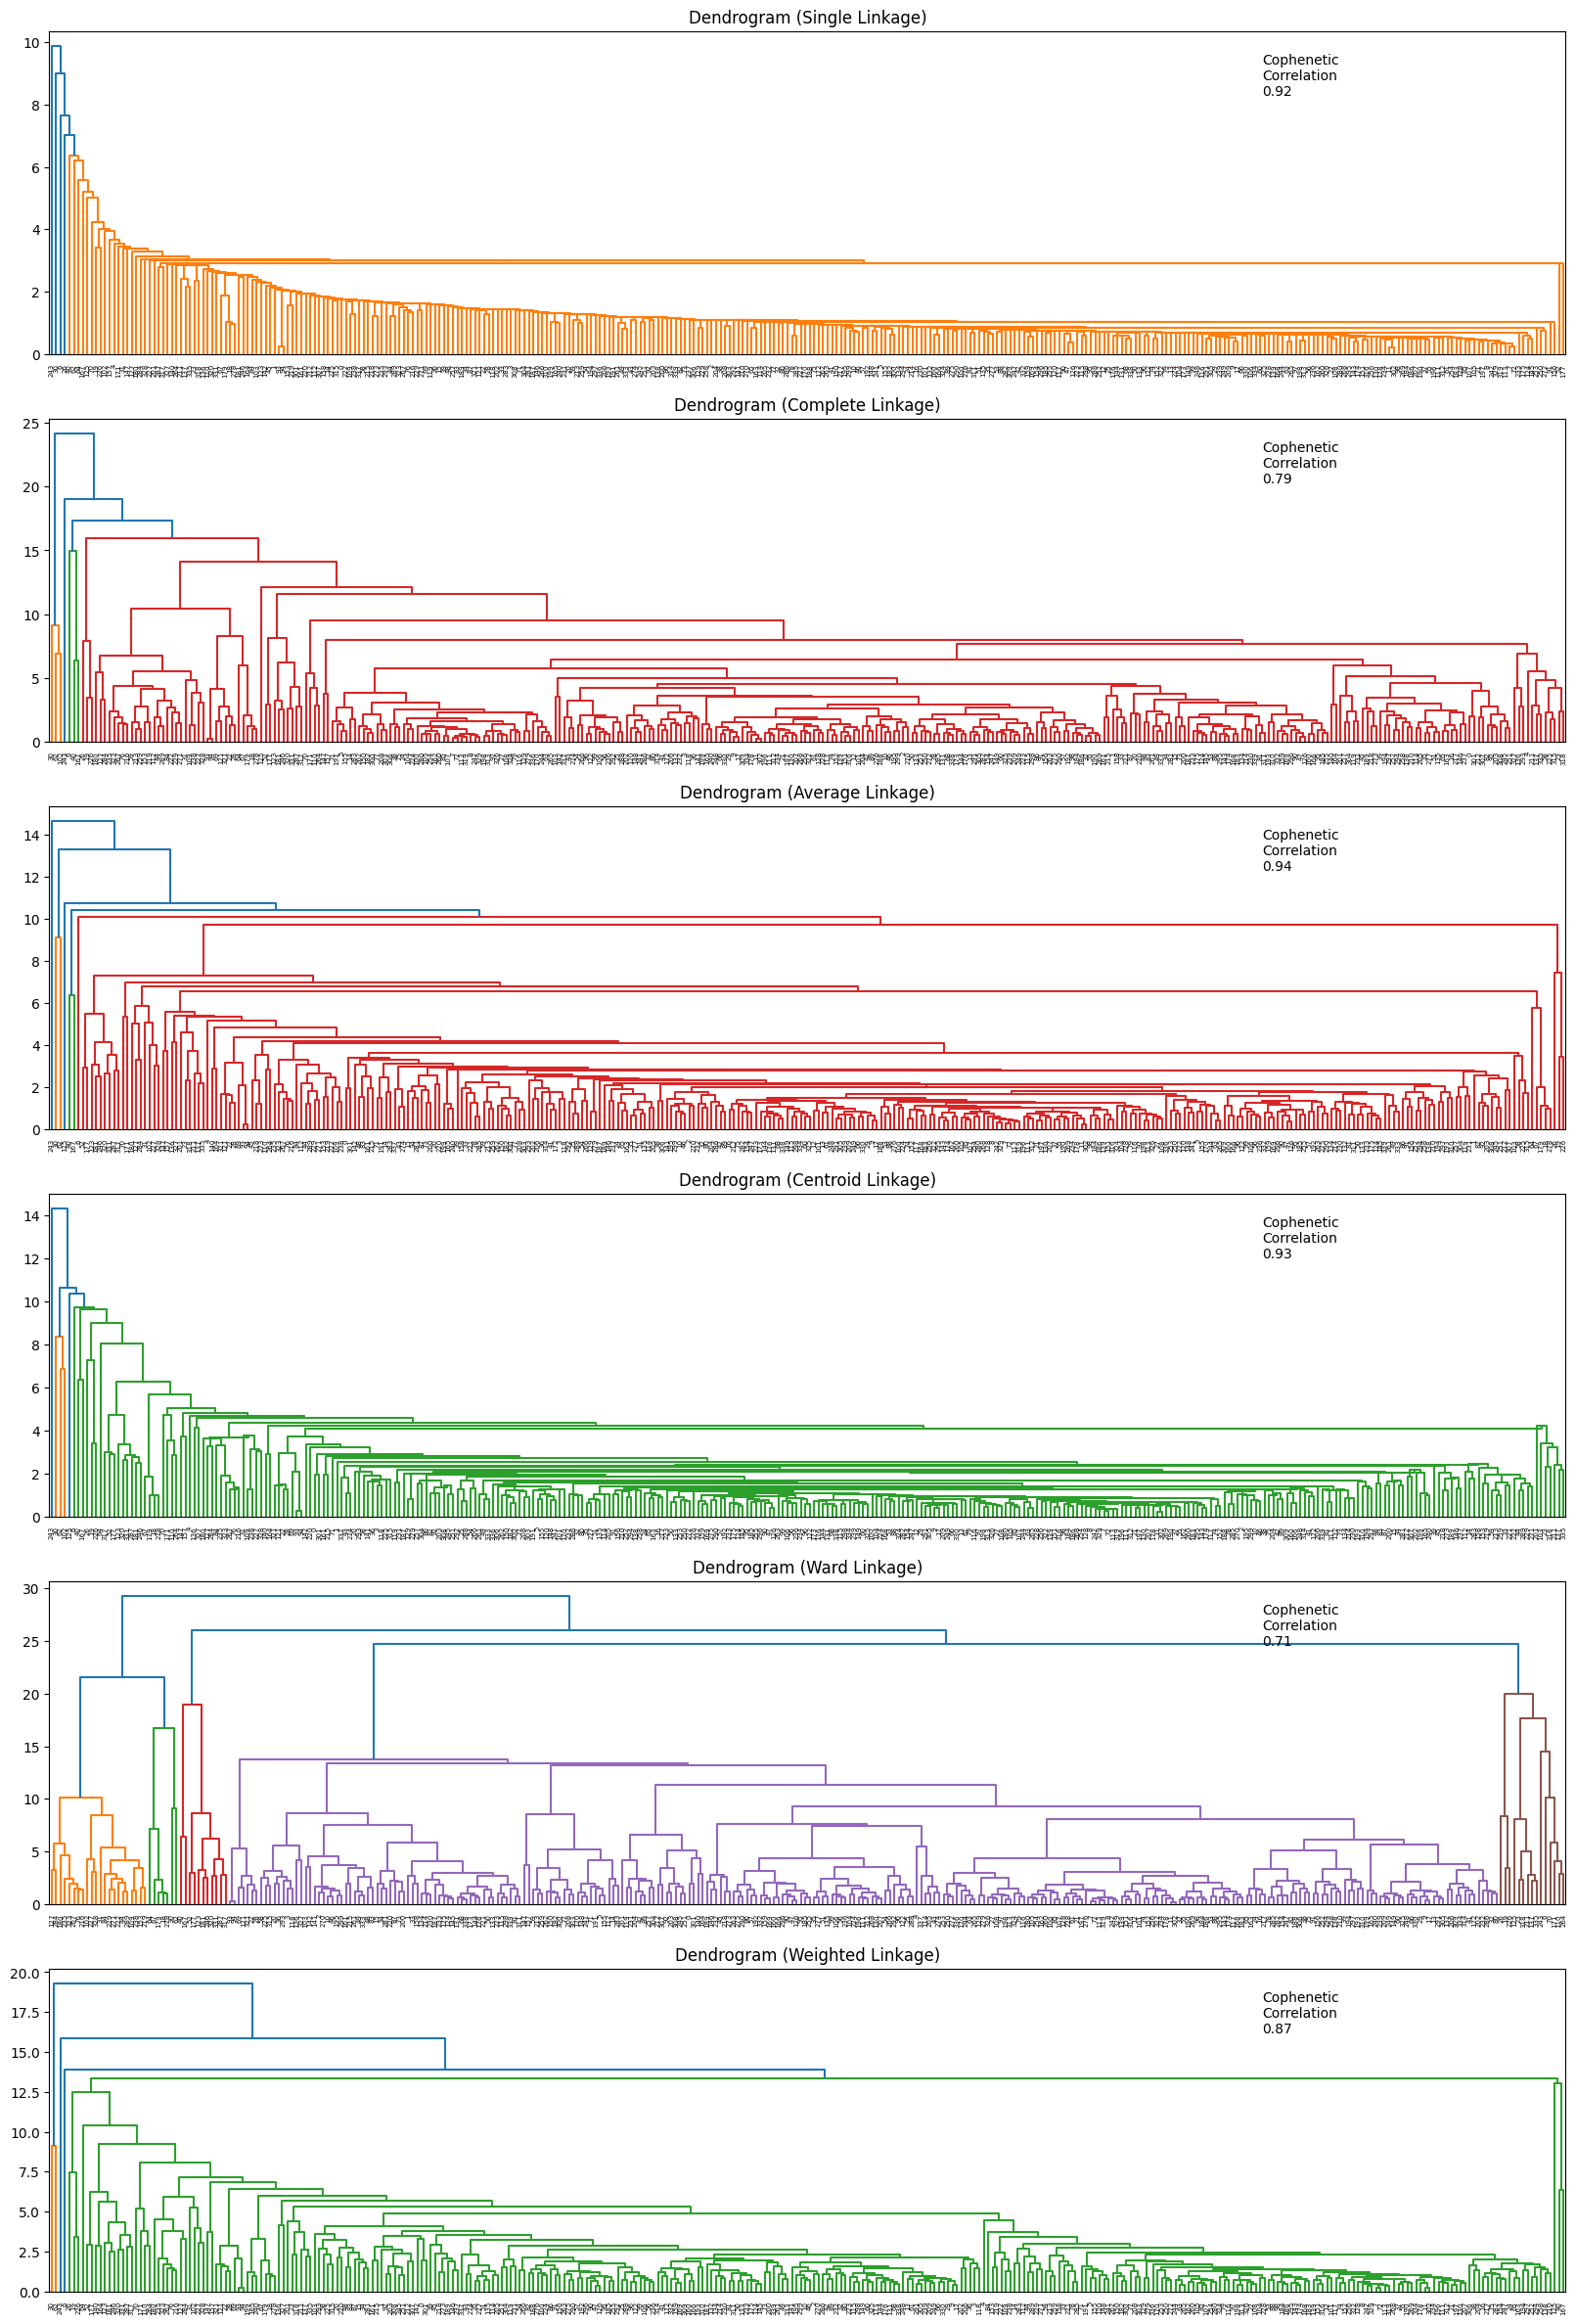

In [94]:
# linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# results
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))

# loops through linkage methods and creates a corresponding dendogram
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled2, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled2))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Since the Hierarchical clustering was tending to group a vast majority of data points in a single cluster, I chose to use the ward linkage method in order have more balanced groups

In [186]:
model2 = AgglomerativeClustering(n_clusters= 5, metric='euclidean',  linkage='ward')

In [187]:
model2.fit(data_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [188]:
data_scaled2['Labels'] = model2.labels_
data_scaled2.head(20)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Labels
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,3
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,3
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,3
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,3
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,3
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752,3
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562,0
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614,3
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530,3
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879,3


In [192]:
data_scaled2.groupby(['Labels']).describe()

Current Price                                                    \
               count      mean       std       min       25%       50%   
Labels                                                                   
0               15.0  2.505708  3.437522 -0.778181  0.292692  1.122324   
1                7.0  0.035679  0.595818 -0.779918 -0.262150 -0.145462   
2               11.0 -0.388253  0.197783 -0.681971 -0.485313 -0.387111   
3              285.0 -0.082748  0.490804 -0.750311 -0.407742 -0.206947   
4               22.0 -0.453698  0.249681 -0.756733 -0.592783 -0.527545   

                            Price Change            ... P/E Ratio             \
             75%        max        count      mean  ...       75%        max   
Labels                                              ...                        
0       4.396836  12.195670         15.0  0.540932  ...  1.307558  11.187619   
1       0.327621   1.044192          7.0 -0.018619  ...  0.272209   1.365673   
2      -0.284007  -0.029745         11.0  0.182860  ... -0.343914  -0.091370   
3       0.115898   2.637786        285.0  0.094682  ... -0.100263   3.293307   
4      -0.336682   0.122537         22.0 -1.680887  ...  1.365673   3.146782   

       P/B Ratio                                                              \
           count      mean       std       min       25%       50%       75%   
Labels                                                                         
0           15.0  1.495760  2.436750 -0.892931  0.225453  0.875924  1.839389   
1            7.0 -0.707801  2.050544 -5.334786 -0.117430 -0.008768  0.072088   
2           11.0 -0.229907  0.737822 -1.768378 -0.124880  0.018065  0.055946   
3          285.0 -0.066608  0.800561 -5.334786 -0.207104  0.032189  0.349747   
4           22.0  0.183208  0.464630 -0.920876  0.049401  0.214520  0.401939   

                  
             max  
Labels            
0       9.377562  
1       0.479628  
2       0.489519  
3       1.741103  
4       1.090521  

[5 rows x 88 columns]

In [193]:
lds2 = data_scaled2.groupby(['Labels'])
lds2.mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Labels,,,,,,,,,,,
0,2.505708,0.540932,0.197290,-0.261365,2.651985,0.120048,-0.160099,0.761418,-0.038039,1.817445,1.495760
1,0.035679,-0.018619,0.510543,6.161211,-0.403730,-0.321038,-1.642594,-2.070221,-0.211767,0.218411,-0.707801
2,-0.388253,0.182860,-0.681013,-0.174988,0.015849,0.258862,3.339022,0.096280,4.339952,-0.392255,-0.229907
3,-0.082748,0.094682,-0.167360,-0.145153,-0.106664,0.012562,0.011237,0.133578,-0.154577,-0.178168,-0.066608
4,-0.453698,-1.680887,2.211622,0.185705,-0.305847,-0.271866,-1.183278,-1.639028,-0.074189,1.195551,0.183208


array([[<Axes: title={'center': 'Cash Ratio'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'Current Price'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'Earnings Per Share'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'Estimated Shares Outstanding'}, xlabel='[Labels]'>],
       [<Axes: title={'center': 'Net Cash Flow'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'Net Income'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'P/B Ratio'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'P/E Ratio'}, xlabel='[Labels]'>],
       [<Axes: title={'center': 'Price Change'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'ROE'}, xlabel='[Labels]'>,
        <Axes: title={'center': 'Volatility'}, xlabel='[Labels]'>,
        <Axes: >]], dtype=object)

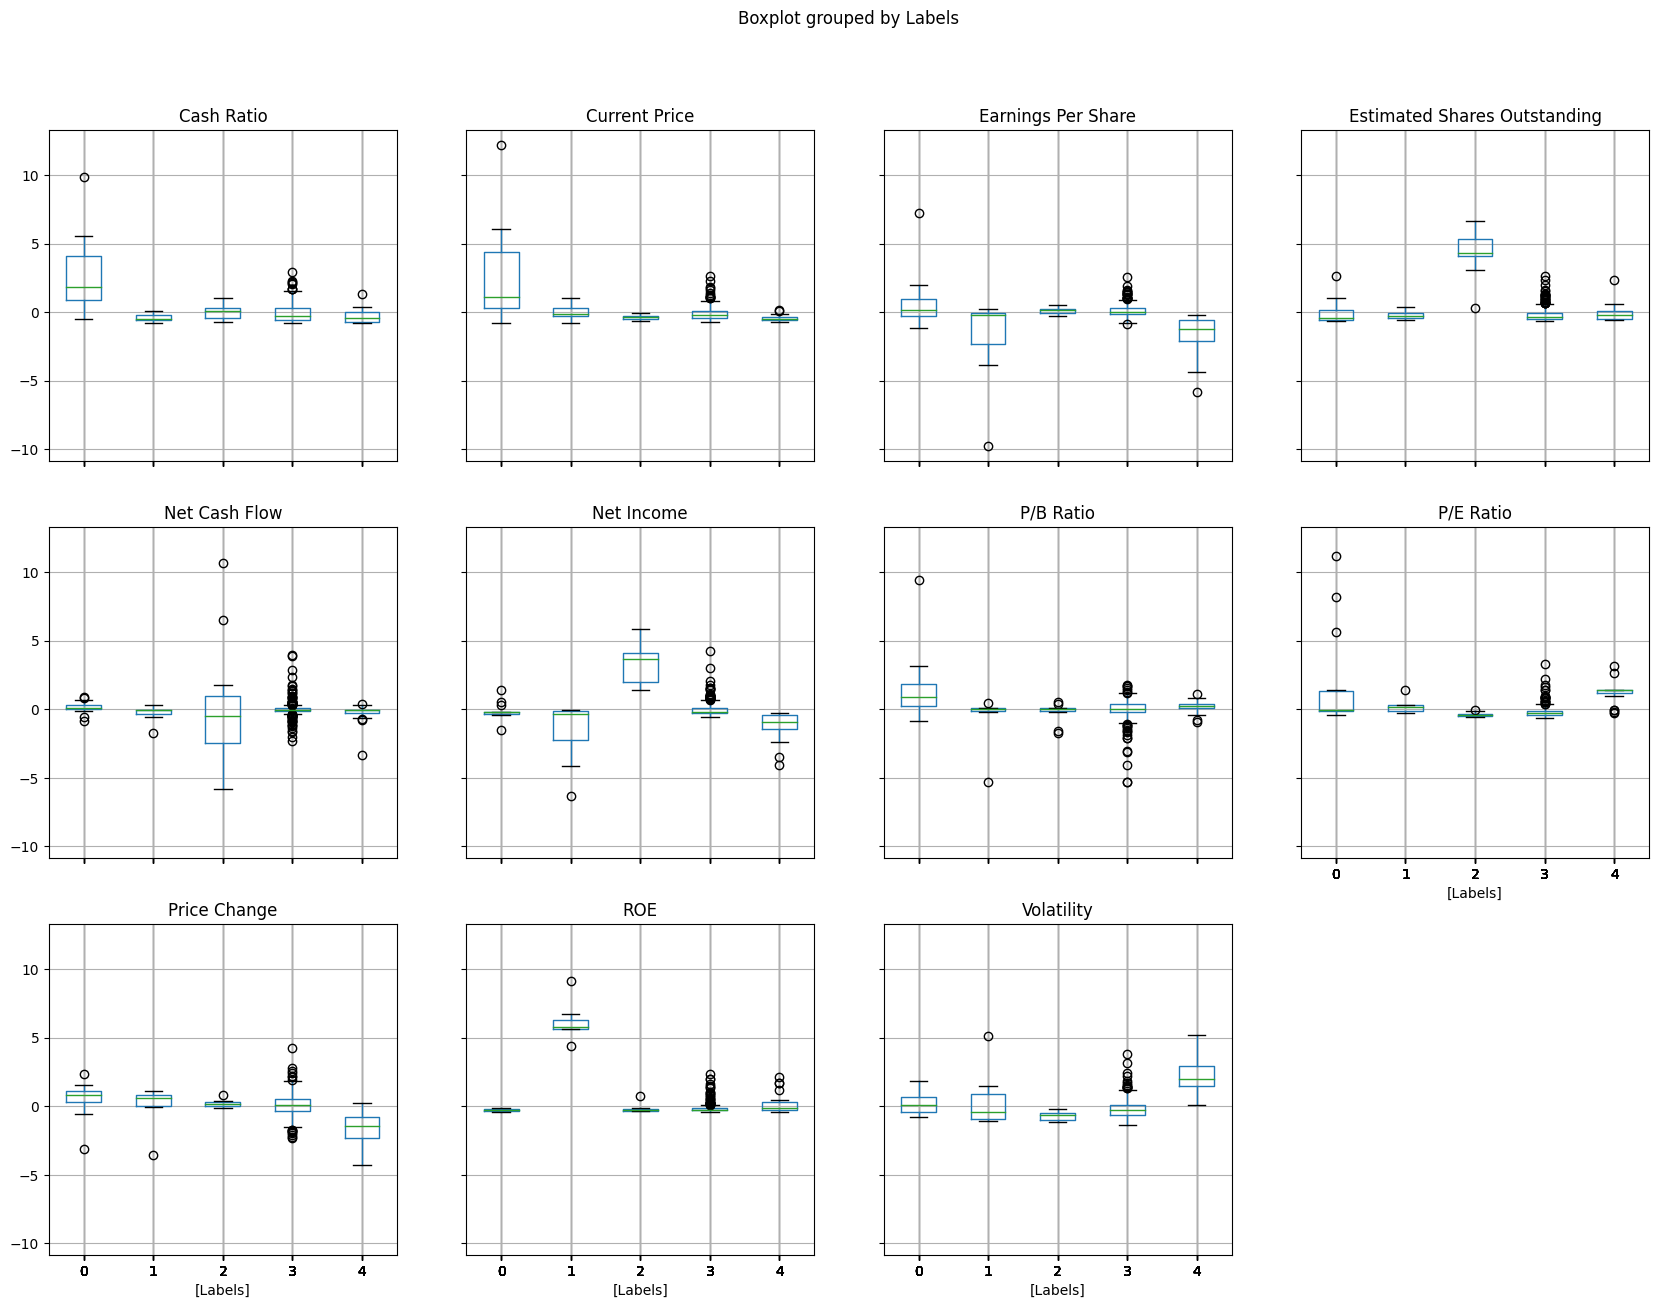

In [194]:
data_scaled2.boxplot(by='Labels', layout = (3,4),figsize=(20,15))

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.



*   Both cluster techinques took a similar amount of times, dendogram creation was the most intesive process in terms of excution time
*  Both models created clusters that separated themselves from each other but k means gave the more distinct clusters


*   both groups tended to create a large cluster with similar qualities
*   Hierachical clustering game me less clusters overall, it tended to give me one massive cluster with most linkage methods and cluster numbers, so I used ward linkage to get more distinct groups. The K means model has 11 clusters, found by using the elbow method and seeing the drop off in the graph.





## Actionable Insights and Recommendations
**Hierarchical**
- Group 1 has outstanding return on equity, while having an average current price. However, they do tend to have lower earings per share.
- Group 4 has high volatility and has a been losing value (negative price change), as well as having a low net income. This group is the least desireable of the bunch.
-Group 2 has the highest net income while being a relatively cheaper option and having lower than average volatility.

**KMeans**


*   Group 3 has the highest volatility and has been decreasing in value lately. They also have the lowest net income, making this a poor preforming group.

- Group 0 had a very low price to book ratio.
- Contrasting this Group 10 had a high price to book ratio, having by far the highest current price and non-outstanding performance on other categories such as net income and ROE.





In [198]:
!jupyter nbconvert --to html DB_USL_Project_LearnerNotebook_FullCode

[NbConvertApp] Converting notebook DB_USL_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 3384767 bytes to DB_USL_Project_LearnerNotebook_FullCode.html
